# 최근접 이웃 알고리즘의 맹점

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

# 훈련 데이터 세트와 테스트 데이터 세트로 분리

In [3]:
from sklearn.model_selection import train_test_split

# 훈 독립변수, 테 독립, 훈 종속, 테 종속
train_input, test_input, train_target, test_target = train_test_split(
    # 전체데이터의 독립변수, # 전체데이터의 종속변수
    perch_length, perch_weight, random_state=42   # 실험 재현성 위해서 샘플 고정
)

# 훈련 세트와 테스트 세트 (독립변수) 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

train_input.shape

(42, 1)

## 모델 만들기

In [4]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 모델 ==> 수치 예측

knr = KNeighborsRegressor(n_neighbors=3) # 하이퍼파라미터 튜닝
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))

[1033.33333333]


# 예측값 결과 시각화

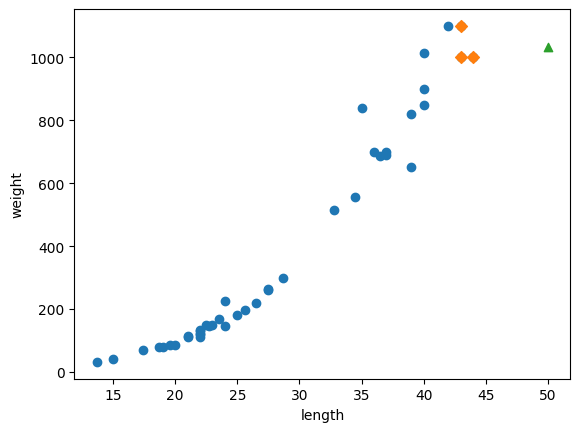

In [7]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(knr.predict([[100]])) # 1m

[1033.33333333]


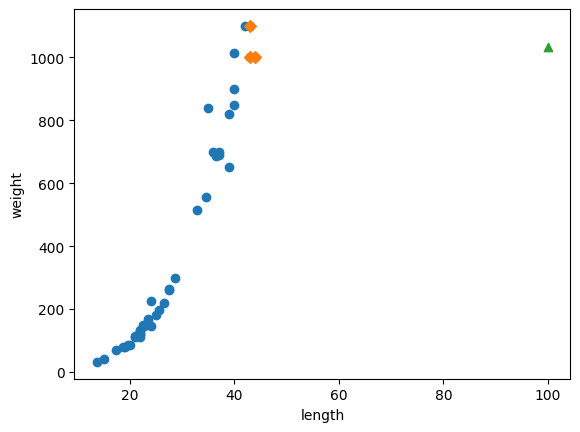

In [13]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 다룰 때 주의점
- 데이터셋 분리 : 분류모델을 진행할 때는 층화추출로 진행
- 스케일링 feature의 단위가 다르면, 하나의 단위로 통일시킴
-- Min-Max 스케일링, Standardization
- 알고리즘에 대한 맹신 금지
-- KNN을 통해서 확인한 것처럼, 알고리즘 특성이 가지고 본연의 단점 있음 ==> 찾아서 대안 마련
-- 단순히, 평가지표만 보고 판단하기 어려움

# 선형회귀
- 미션, 50cm 농어에 대한 예측 & 100cm 농어에 대한 예측

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [17]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


[3192.69585141]
x가 15일 때 [-123.7614705]
x가 50일 때 [1241.83860323]


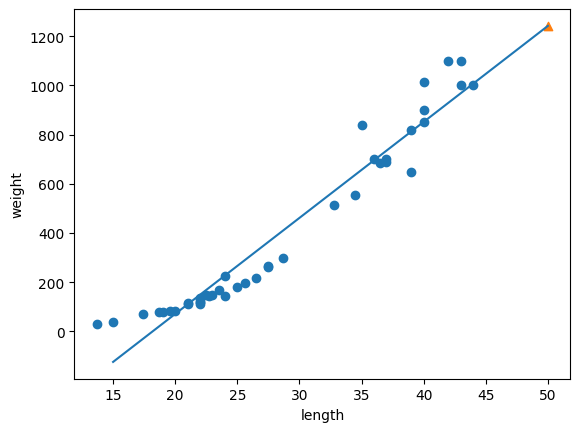

In [21]:
print(lr.predict([[100]])) # 1m

"""
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
#                   y = ax + b
print(f'x가 15일 때 {15*lr.coef_+lr.intercept_}')
print(f'x가 50일 때 {50*lr.coef_+lr.intercept_}')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [22]:
lr.score(train_input, train_target) # 훈련세트에 대한 평가

0.939846333997604

In [23]:
lr.score(test_input, test_target) # 테스트세트에 대한 평가

0.8247503123313558

## 모델 선정 못하는 이유
- 길이가 0이상이면, 무게가 음수가 나올수가 없음
- 해결방안 : 1차함수 ==> 2차함수로 변경

# 다항회귀
- $무게 = a * 길이^2 + b * 길이 + c$


In [24]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_input.shape, train_poly.shape

((42, 1), (42, 2))

In [26]:
train_poly[0], train_input[0]

(array([384.16,  19.6 ]), array([19.6]))

In [27]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

                  # 길이^2, 길이
print(lr.predict([[50 ** 2,  50]]))

[1573.98423528]


In [29]:
print(lr.coef_, lr.intercept_)

# y = ax^2 + bx + c

[  1.01433211 -21.55792498] 116.0502107827827


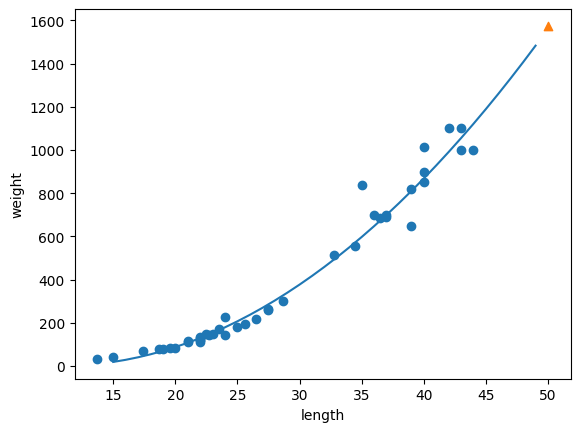

In [30]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [32]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 결졍트리

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [34]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/머신러닝/data/'
wine = pd.read_csv(DATA_PATH + "wine.csv")
wine

# 알코올 도수, 당도, ph값에 레드 와인, 화이트 와인 분류
# 0이면 레드와인, 1이면 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


## 데이터셋 확인

In [35]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [36]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 탐색적 자료 분석
- 시각화 & 통계 분석
- 데이터의 주요 특징 파악

## 독립변수와 종속변수 분리

In [37]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 독립변수
target = wine['class'].to_numpy() # 종속변수

data.shape, target.shape

((6497, 3), (6497,))

## 테스트 셋 분리

In [38]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 엔지니어링
- 피처 스케일링 : 독립변수 피처들의 단위를 통일 시킴
  + 결정트리에는 굳이 적용 할 필요 없음
  + 일반 선형모델에는 무조건 적용

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [40]:
train_input[0], train_scaled[0]

(array([10.5 ,  7.7 ,  3.19]), array([ 0.01376574,  0.4646116 , -0.16888369]))

## 로지스틱 회귀

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [44]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 모델 해석 어려움
- 머신러닝 예측, 정확도
- 알코올 도수의 기울기 0.51임 이것의 정확도는 77%

## 대안으로 결정 트리 사용
- 이유 설명 하기 매우 쉬움

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


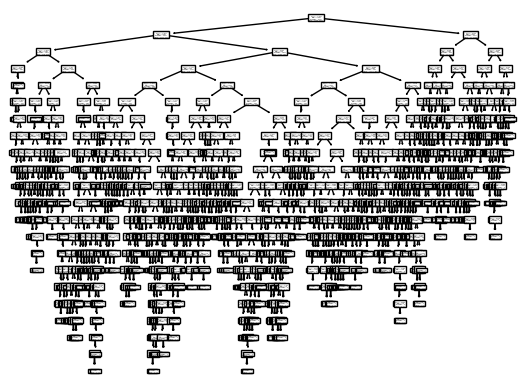

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


- 불순도가 높다 ==> 분류가 잘 안되고 있음 ==> 지니계수도 높음
- 불순도가 낮다 ==> 분류가 잘 되고 있다 ==> 지니계수는 낮음

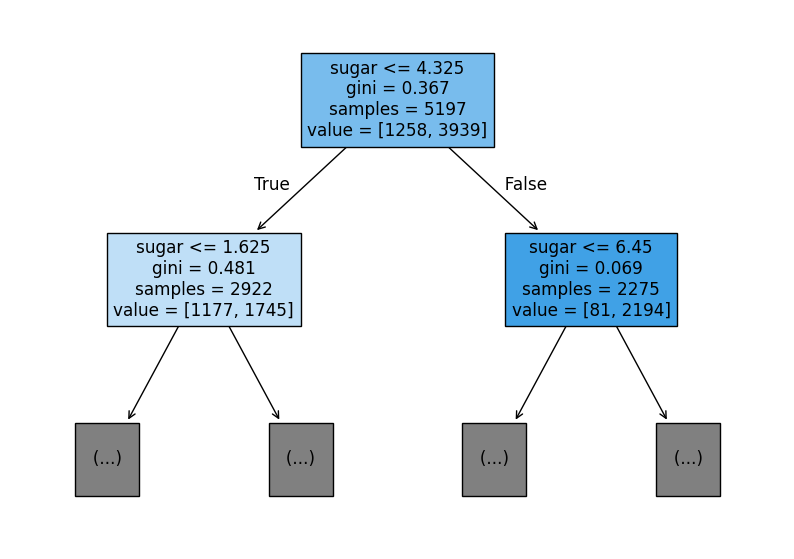

In [54]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 하이퍼파라미터 튜닝
- 가지치기


0.8672310948624207
0.8607692307692307


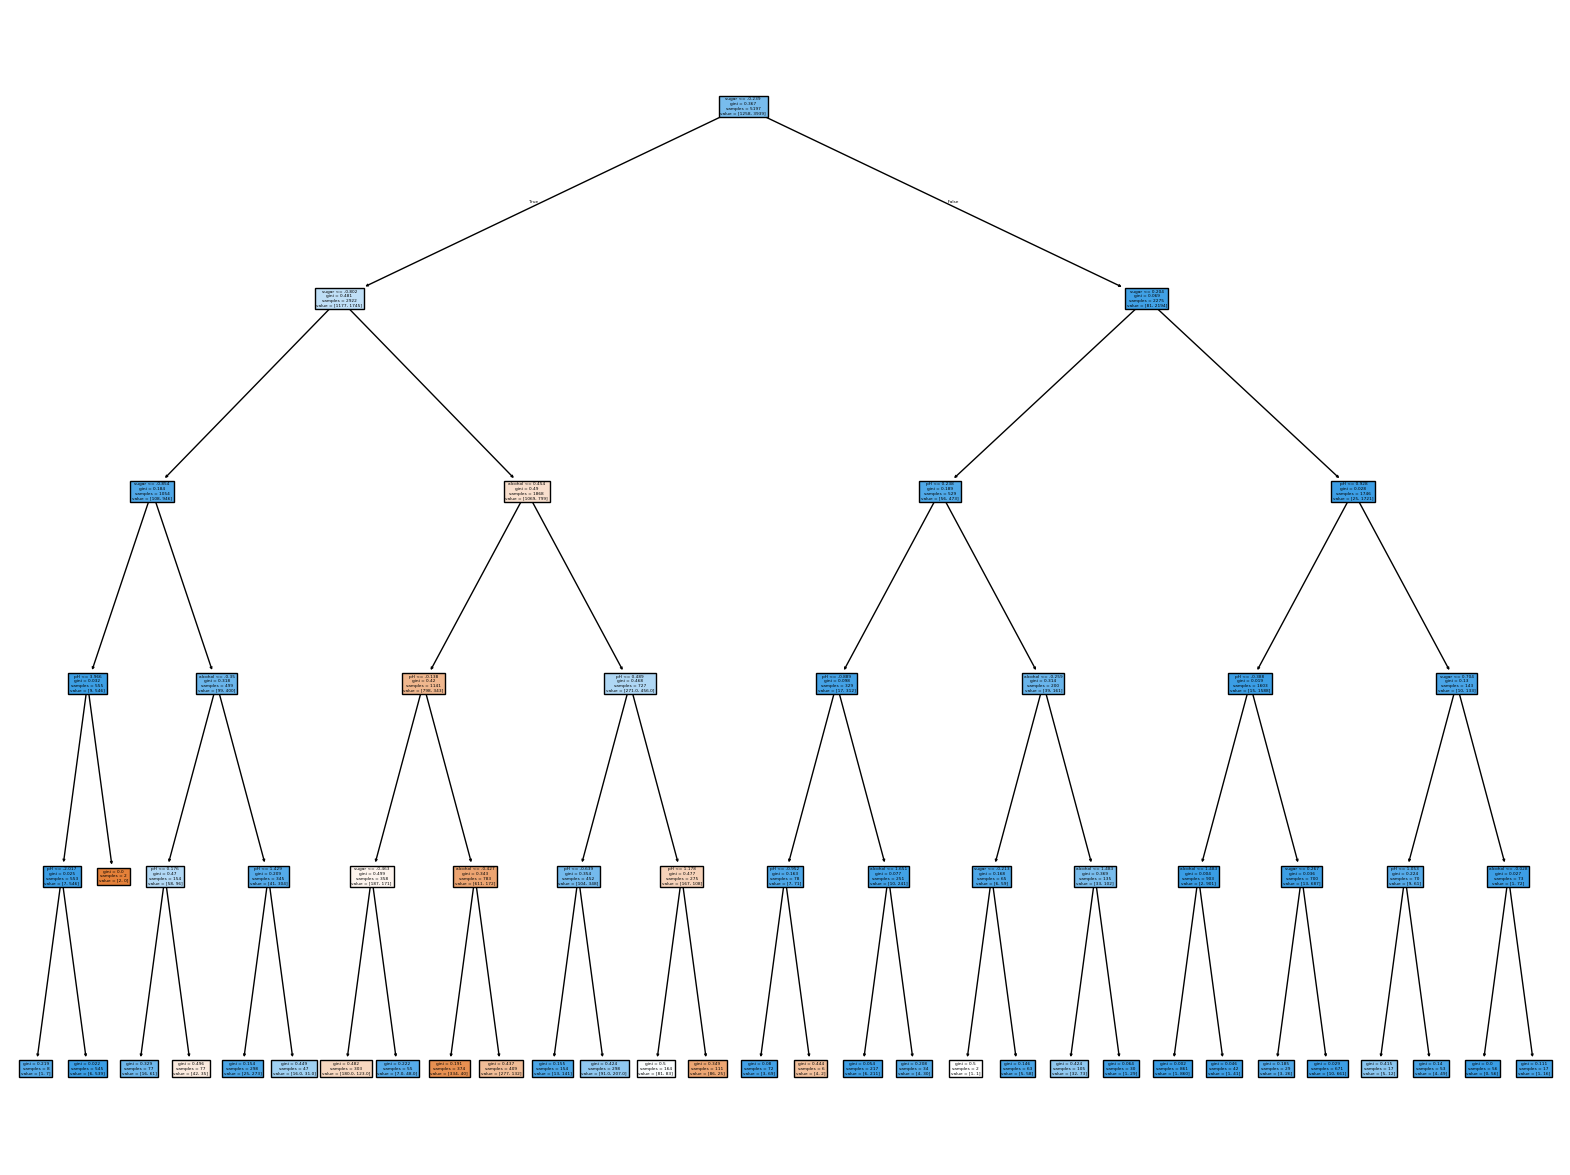

In [59]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련데이터, 84.5%
print(dt.score(test_scaled, test_target)) # 테스트데이터, 84.1%

# 기존
# 훈련데이터 : 0.996921300750433
# 테스트데이터 : 0.8584615384615385

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증 (Cross Validation)
- 원 데이터에서 훈련 데이터 / 테스트 데이터 분리
- 원 데이터에서 훈련 데이터 / 검증 데이터 / 테스트 데이터 분리
- 축구대표팀
  : 훈련 트레이닝
  : 국내 실업팀과 하는 평가전 ==> 검증
  : 타 국가와 경기하는 평가전 ==> 테스트

## 데이터 불러오기

In [60]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 독립변수
target = wine['class'].to_numpy() # 종속변수

data.shape, target.shape

((6497, 3), (6497,))

## 데이터셋 분리
- 1차, 2차 나눠서 분리
- 1차 분리 : 훈련 데이터와 테스트 데이터 분리
- 2차 분리 : 1차에서 구분된 훈련 데이터 활용해서 다시 훈련데이터와 검증 데이터로 분리

In [61]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

# 훈련           검증             테스트
sub_input.shape, val_input.shape, test_input.shape

((4157, 3), (1040, 3), (1300, 3))

## 베이스라인 모델
- 기본 모델

In [62]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target)) # 훈련 데이터
print(dt.score(val_input, val_target)) # 검증 데이터

0.9971133028626413
0.864423076923077


## 교차 검증
- 축구대표팀 : 국내 여러팀과 더 경기를 해서 최적의 전략을 찾아야 함
- 1차 검증 => 점수
- 2차 검증 => 점수
- 3차 검증 => 점수
- 위 1-3차 검증 결과의 점수 평균 내서 최종적으로 산출

In [63]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.01712012, 0.01189494, 0.01237416, 0.0189178 , 0.01982188]),
 'score_time': array([0.00223684, 0.00215364, 0.00212836, 0.00210285, 0.00184584]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [65]:
np.mean(scores['test_score']) # 최종 평균 스코어

0.855300214703487

# 하이퍼파라미터 튜닝
- Grid Search vs RandomSearch

In [76]:
from sklearn.model_selection import GridSearchCV

# 매개변수 지정 시, 딕셔너리 활용
# key값은 각 모델의 공식문서 보고 작성
# max_depth

# 매개변수명을 지정
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003]}

# max_depth 추가
params = {
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003],
    'max_depth' : [3, 4, 5]
}

In [77]:
dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(dt, params, n_jobs = -1) # 컴퓨터의 모든 자원 다 쓰겠음
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003]})

In [78]:
best_dt = gs.best_estimator_ # 가장 좋은 모델을 선정함
print(best_dt.score(train_input, train_target))
print(gs.best_params_)

0.8668462574562248
{'max_depth': 5, 'min_impurity_decrease': 0.0003}


## 추천코드 : RandomSearchCV

In [84]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [86]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier(random_state=42)
gs = RandomizedSearchCV(dt, params, n_jobs=-1,)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef87ceb31f0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef87fae6050>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef87ceb23e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef87d7d59c0>})

In [87]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.0009150674788933412, 'min_samples_leaf': 15, 'min_samples_split': 22}


In [90]:
import pandas as pd
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012612,0.002589,0.002289,0.000433,28,0.001044,22,16,"{'max_depth': 28, 'min_impurity_decrease': 0.0...",0.847115,0.870192,0.881617,0.845043,0.863330,0.861460,0.013866,10
1,0.013765,0.003458,0.006181,0.003979,22,0.000211,20,17,"{'max_depth': 22, 'min_impurity_decrease': 0.0...",0.856731,0.867308,0.885467,0.847931,0.859480,0.863383,0.012660,5
2,0.014364,0.004319,0.003593,0.003297,37,0.000861,3,12,"{'max_depth': 37, 'min_impurity_decrease': 0.0...",0.855769,0.871154,0.881617,0.850818,0.851781,0.862228,0.012138,7
3,0.015689,0.002472,0.002000,0.000087,46,0.000403,21,4,"{'max_depth': 46, 'min_impurity_decrease': 0.0...",0.862500,0.866346,0.889317,0.845043,0.860443,0.864730,0.014269,3
4,0.015148,0.000860,0.004137,0.002723,39,0.000915,15,22,"{'max_depth': 39, 'min_impurity_decrease': 0.0...",0.857692,0.869231,0.882579,0.849856,0.866218,0.865115,0.011055,1
5,0.014564,0.004814,0.003667,0.003526,46,0.000839,16,17,"{'max_depth': 46, 'min_impurity_decrease': 0.0...",0.847115,0.870192,0.882579,0.849856,0.865255,0.863000,0.013155,6
6,0.007311,0.000333,0.002016,0.000377,37,0.000703,1,9,"{'max_depth': 37, 'min_impurity_decrease': 0.0...",0.853846,0.871154,0.884504,0.848893,0.850818,0.861843,0.013809,9
7,0.011129,0.007006,0.004251,0.004756,20,0.000818,14,11,"{'max_depth': 20, 'min_impurity_decrease': 0.0...",0.857692,0.870192,0.881617,0.849856,0.865255,0.864922,0.010825,2
8,0.013422,0.005812,0.003197,0.002841,34,0.000495,21,4,"{'max_depth': 34, 'min_impurity_decrease': 0.0...",0.856731,0.866346,0.889317,0.848893,0.855630,0.863383,0.014111,4
9,0.009063,0.002814,0.001861,0.000083,21,0.000970,1,10,"{'max_depth': 21, 'min_impurity_decrease': 0.0...",0.855769,0.870192,0.881617,0.850818,0.851781,0.862035,0.012002,8


## 모형 평가

In [91]:
new_dt = gs.best_estimator_
new_dt.score(test_input, test_target) # 최종 테스트 데이터

0.8576923076923076